In [35]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as Layers

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

def process(dataset):
    return (dataset.astype('float32')/255.)

x_train = process(x_train)
x_test = process(x_test)

In [39]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


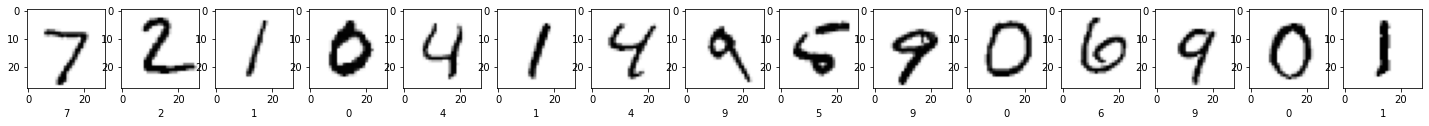

In [23]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,15,figsize=(25,5))


for i in range(0,15):
    axis[i].imshow(x_test[i], cmap='Greys')
    
for i, ax in enumerate(axis.flat):
    ax.set(xlabel= y_test[i])

In [11]:
# MODEL

model = tf.keras.models.Sequential([
    Layers.LSTM(64, activation="relu",input_shape=(28,28)),
    Layers.Dense(32, activation="relu"),
    Layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                23808     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,218
Trainable params: 26,218
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    epochs=7
)

Epoch 1/7
1688/1688 [==============================] - 24s 13ms/step - loss: 0.0413 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.0483 - val_sparse_categorical_accuracy: 0.9877
Epoch 2/7
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0387 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0759 - val_sparse_categorical_accuracy: 0.9783
Epoch 3/7
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0348 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0450 - val_sparse_categorical_accuracy: 0.9875
Epoch 4/7
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9907 - val_loss: 0.0454 - val_sparse_categorical_accuracy: 0.9887
Epoch 5/7
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9903 - val_loss: 0.0478 - val_sparse_categorical_accuracy: 0.9877
Epoch 6/7
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0251 -

313/313 [==============================] - 2s 5ms/step


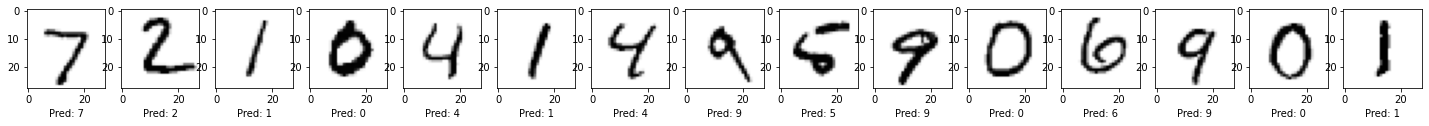

In [29]:
p = model.predict(x_test)
pred = np.argmax(p,axis=1)

fig, axis = plt.subplots(1,15,figsize=(25,5))

for i in range(0,15):
    axis[i].imshow(x_test[i], cmap='Greys')
    
for i, ax in enumerate(axis.flat):
    ax.set(xlabel= "Pred: {}".format(pred[i]))

In [41]:
from sklearn.metrics import r2_score

accu = r2_score(y_test,pred)
print("R2 Score: {:0.2f}%".format(accu*100))

R2 Score: 96.69%


In [43]:
evaluation = model.evaluate(x_test,y_test)
print('Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0589 - sparse_categorical_accuracy: 0.9842
Loss over the test dataset: 0.06, Accuracy: 0.98
